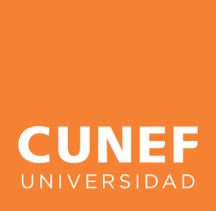

Realizado por:

***Sergio Ranz Casado***  
***Marcos Medina Cogolludo***

---

Una vez realizado el EDA y el preprocesamiento, tenemos dividida nuestra muestra entre train y test. Toca realizar los modelos de predicción del primero objetivo establecido, que es la detección de mortalidad en un accidente de trafico, por lo tanto nos encontramos ante un problema de clasificación (muerte, no muerte) del que queremos extraer una predicción en tanto porcentual. 

**3.0.1. ARBOL DE DECISIÓN:**
----
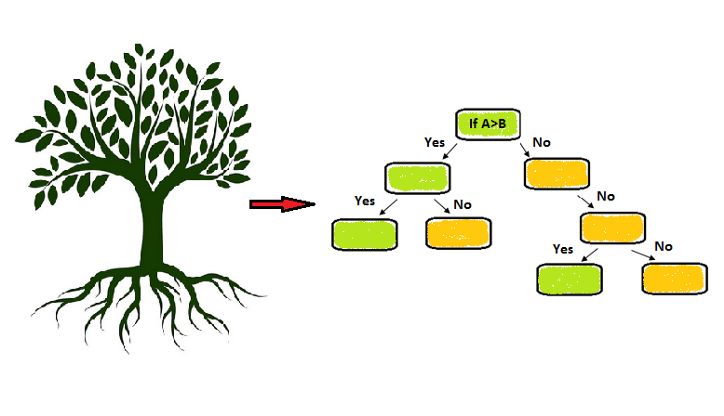
- Hemos escogido el modelo de [`Árbol de decisión`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Sabemos de primera mano que su poder predictivo esta limitado con respecto a otros pero lo hemos escogido debido a su facil implementación. 
- Otra de las características por la que hemos elegido el arbol de decisión es porque suele ser un muy buen selector, es decir, nos puede indicar que variables son las que mas peso tienen con respecto a la variable objetivo. 

Un [`árbol de decisión`](https://www.datacamp.com/community/tutorials/decision-tree-classification-python) es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. El nodo superior en un árbol de decisiones se conoce como nodo raíz. Aprende a particionar sobre la base del valor del atributo. Divide el árbol de manera recursiva y lo llama partición recursiva. Esta estructura similar a un diagrama de flujo le ayuda en la toma de decisiones. Es una visualización como un diagrama de flujo que imita fácilmente el pensamiento a nivel humano. Es por eso que los árboles de decisión son fáciles de entender e interpretar.

---


**METODOS DE CLASIFICACIÓN**
---

Como ya hemos comentado en notebooks anteriores. El principal problema que nos encontramos en este dataset es el desbalanceo de datos. La gran desproporcionalidad que existe entre los accidentes de trafico mortales de los que no son mortales es de 2% a 98%. Si bien, es cierto que hemos actuado frente a este desbalanceo mediante una `técnica de muestreo aleatorio`en el notebook 
[2.0.3.Preprocesing.](http://localhost:8888/notebooks/Desktop/CUNEF/Practica%20Machine%20Learning/project_template/notebooks/2.0.3.%20Preprocesing.%20SPLIT%2C%20NA%2C%20OUTLIER.%20.ipynb) 

Sin embargo, nos seguimos encontrado con este problema en la muestra de test seleccionada. Esto afectará a nuestras métricas, en nuestro caso, no representarán la precisión ni el recall adecuado del modelo.

Sabiendo el problema al que nos enfrentamos y teniendo como objetivo la predicción de la mortalidad en un accidente de tráfico. (Problema de clasificación), enumeramos a continuación las métricas que vamos a utilizar: 

- `Precisión:` Se define como la división de los verdaderos positivos (TP) de entre todos los positivos predichos (TP + FP).En nuestro caso en particular, será este dato el que este desequilibrado, ya que hay una desproporcionalidad de la muestra de muertes y no muertes. 

$$\frac{\textrm{TP}}{\textrm{TP+FP}}$$


- `Recall:` Se define como todos los ejemplos predichos que pertenecen a una clase (TP) de entre todos los positivos predichos (TP + FN). 

$$\frac{\textrm{TP}}{\textrm{TP+FN}}$$

- [`Accuracy`](https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/): Es una metrica que resume el rendimiento de un modelo de clasificación con el número de predicciones correctas dividido por el número total de predicciones. Debido a que la predicción no es una métrica fiable, esta métrica tampoco lo será. 

$$\frac{\textrm{TP+TN}}{\textrm{TP+TN+FP+FN}}$$

- [`Matriz de confusión:`](https://medium.com/analytics-vidhya/accuracy-on-imbalanced-datasets-and-why-you-need-confusion-matrix-937613bf89bf) La métrica mas simple y al mismo tiempo la más efectiva para mirar el desempeño de los modelos en casos de dataset imbalanceados. Nos muestra la relacción que existe entre positivos acertados (TP), positivos fallados (FN), negativos acertados(TN), y negativos fallados (FP). 


- [`F1-Score:`](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/) La F-Score combina las dos métricas de precisión y recall dentro de un mismo valor, añadiendo un parámetro `Beta`, que aplica un peso mayor a la precisión (Beta < 1) o un peso mayor al recall (Beta > 1). En nuestro caso, aplicaremos una F-1, ya que el peso lo aplicaremos en el modelo.

$$2 \times\frac{\textrm{Precision} \times \textrm{Recall}}{\textrm{Precision} + \textrm{Recall}}$$
    
   
- [`La curva ROC:`](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/) Resume el rendimiento del modelo en la clase binaria positiva. Es una herramienta de diagnóstico popular para clasificadores en problemas de predicción binaria balanceados y desequilibrados por igual porque no está sesgada hacia la clase mayoritaria o minoritaria.


- [`Precision-Recall AUC:`](https://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/) Representa la precisión y el recall para diferentes umbrales de probabilidad. Es una tecnica muy efectiva para dataset desequilibrados debido a su enfoque en la clase minoritaria, es decir, en la mortalidad. 


- [`Cumulative Gain Curve`](https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14#:~:text=The%20cumulative%20gains%20curve%20is,target%20according%20to%20the%20model.) Evalua el rendimiento del modelo comparando los resultado con la selección aleatoria.


- [`Lift Curve`](https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14#:~:text=The%20cumulative%20gains%20curve%20is,target%20according%20to%20the%20model.) Mide la cantidad de ganancias que tiene nuestro modelo aplicandolo con respecto a la selección aleatorio.  Nos indica cuanto vale la pena implementar ese modelo. 


---

#### Importo Librerias

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pyarrow.csv as pv
import pyarrow.parquet as pq
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
import pandas as pd
import pyarrow.csv as pv
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import time
import scikitplot as skplt

---

#### Importamos funciones: 

In [3]:
def classify_metrics(modelo, x_test, y_test, predict): 
    
    '''Imprimimos el reporte de clasificación:  '''
    
    print("Classification Report")
    print(classification_report(y_test, predict))
    
    '''Imprimimos el Accuracy: '''
    print("Accuracy:", metrics.accuracy_score(y_test, predict))
    
    '''Imprimimos el F1-score'''
    print("F1-Score:", metrics.f1_score(y_test, predict))
    
    print("---")
    
    '''Matriz de confusión: '''
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(modelo, x_test, y_test,
                                     display_labels=["mortal", "no mortal"],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    yhat = modelo.predict_proba(x_test)
    pos_pred = yhat[:,1]
    
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Random Forest')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()

    
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    
    '''Dibujando la curva ROC: '''
    print("CURVA ROC con THRESHOLD:")
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Modelo')
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    
    '''Calculando el area AUC: '''
    print("AREA AUC: ")
    # calculate roc auc
    roc_auc = roc_auc_score(y_test, pos_pred)
    print('ROC AUC %.3f' % roc_auc)
    
    '''Calculamos la curva pr: '''
    # calculate pr-curve
    precision, recall, thresholds = precision_recall_curve(y_test, pos_pred)
    print("PRECISSION/RECALL CURVE: ")
    # plot the roc curve for the model
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Random Forest')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    # show the plot
    plt.show()
    
    '''Cumulative Gain Curve: '''
    skplt.metrics.plot_cumulative_gain(y_test, yhat)
    plt.show()
    
    '''Lift Curve:'''
    skplt.metrics.plot_lift_curve(y_test, yhat)
    plt.show()

#### Importamos el train y test : 

In [4]:
train = pd.read_parquet('../data/train1.parquet')
test = pd.read_parquet('../data/test1.parquet')

In [5]:
x_train = train.drop('c_sev',axis=1)
x_test = test.drop('c_sev',axis=1)
y_train = train['c_sev']
y_test = test['c_sev']

---

#### Modelo de Arbol de Decisión.

In [6]:
%%time
dtc = DecisionTreeClassifier(max_depth=4)
start = time.time()
model1 = dtc.fit(x_train, y_train)
end = time.time()
ypred_dtc = model1.predict(x_test)
print(ypred_dtc)
print('Tiempo de ejecución fit: ', end-start)

[1 1 0 ... 1 1 1]
Tiempo de ejecución fit:  0.09878802299499512
Wall time: 148 ms


#### Metricas: 

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.59      0.08      8960
           1       0.99      0.73      0.84    453620

    accuracy                           0.72    462580
   macro avg       0.51      0.66      0.46    462580
weighted avg       0.97      0.72      0.82    462580

Accuracy: 0.7233062389208353
F1-Score: 0.8372722799781831
---
Confusion matrix, without normalization
[[  5310   3650]
 [124343 329277]]
Normalized confusion matrix
[[0.59263393 0.40736607]
 [0.27411269 0.72588731]]


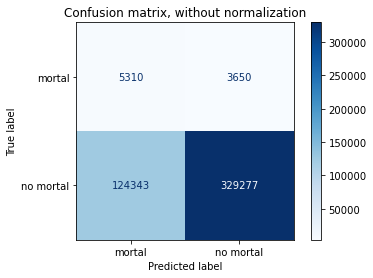

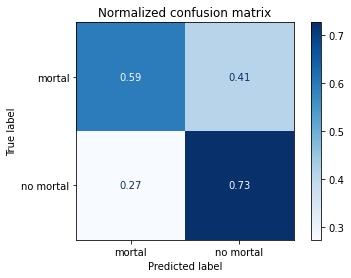

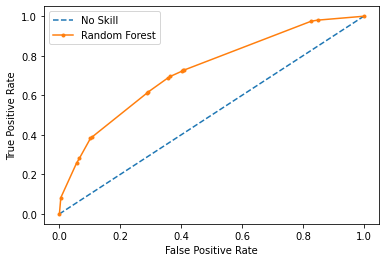

Best Threshold=0.610592, G-Mean=0.665
CURVA ROC con THRESHOLD:


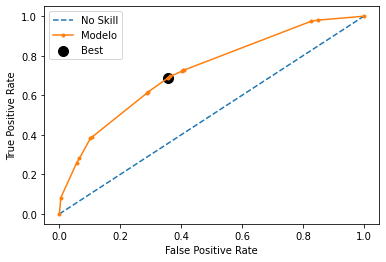

AREA AUC: 
ROC AUC 0.725
PRECISSION/RECALL CURVE: 


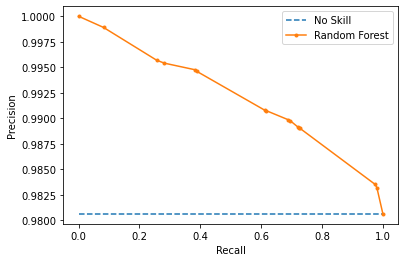

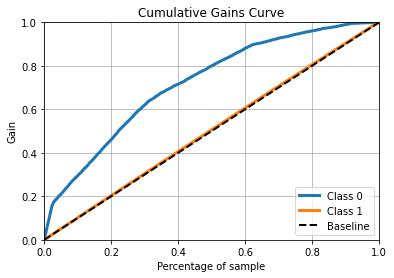

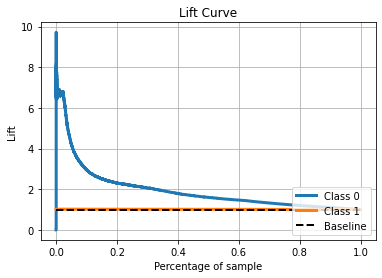

In [7]:
classify_metrics(model1, x_test, y_test, ypred_dtc)

#### AJUSTAMOS EL MODELO CON EL THRESHOLD OBTENIDO

In [8]:
'''Definimos los thresholds, el gmeans, el fpr y el tpr: '''
yhat = model1.predict_proba(x_test)
pos_pred = yhat[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pos_pred)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

In [9]:
'''Realizamos la predicción aplicando el threshold: '''
y_pred_final = (pos_pred >= thresholds[ix]).astype(int)
y_pred_final

array([1, 1, 0, ..., 1, 1, 1])

<AxesSubplot:>

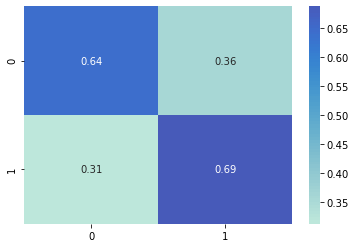

In [10]:
x = metrics.confusion_matrix(y_test,y_pred_final, normalize='true')
sns.heatmap(x, annot=True, center=1)

#### Comentario: 

Tal y como hemos comentado al principio, no hemos escogido el arbol de decisión por sus métricas de predicción, sino para ver qué peso les aplica a las variables. Lo que haremos a continuación... 

En cuanto a las metricas, Tenemos un F-1 Score muy alto, debido a que el algoritmo acierto muchos no muertos, sin embargo, no es simbolico, ya que no le hemos aplicado ningún peso al modelo, el verdadero f-score que tendríamos que haber sacado es f-0.5 el cual será mucho menor. La curva roc no parece que sea del todo buena al igual que la curva precisión, recall que en algunos tramos es mas favorable a la precisión, pero no en todos (esta muy equilibrada con el recall). 

En cuanto a la curva de ganancias y la lift curve nos muestran que nuestro modelo vale 2 veces mas que aplicar un modelo aleatorio, lo que resulta una ganancia bastante escasa. 

Hemos realizado de nuevo la predicción y la matriz de confusión con un mejor threshold. Sin embargo, sigue sin ser suficiente, las predicciones nos muestran que acertamos mas NO ACCIDENTES que ACCIDENTES por lo que no vamos a activar todo el capital que deberíamos. 


#### Dibujamos una parte del árbol de decisión: 

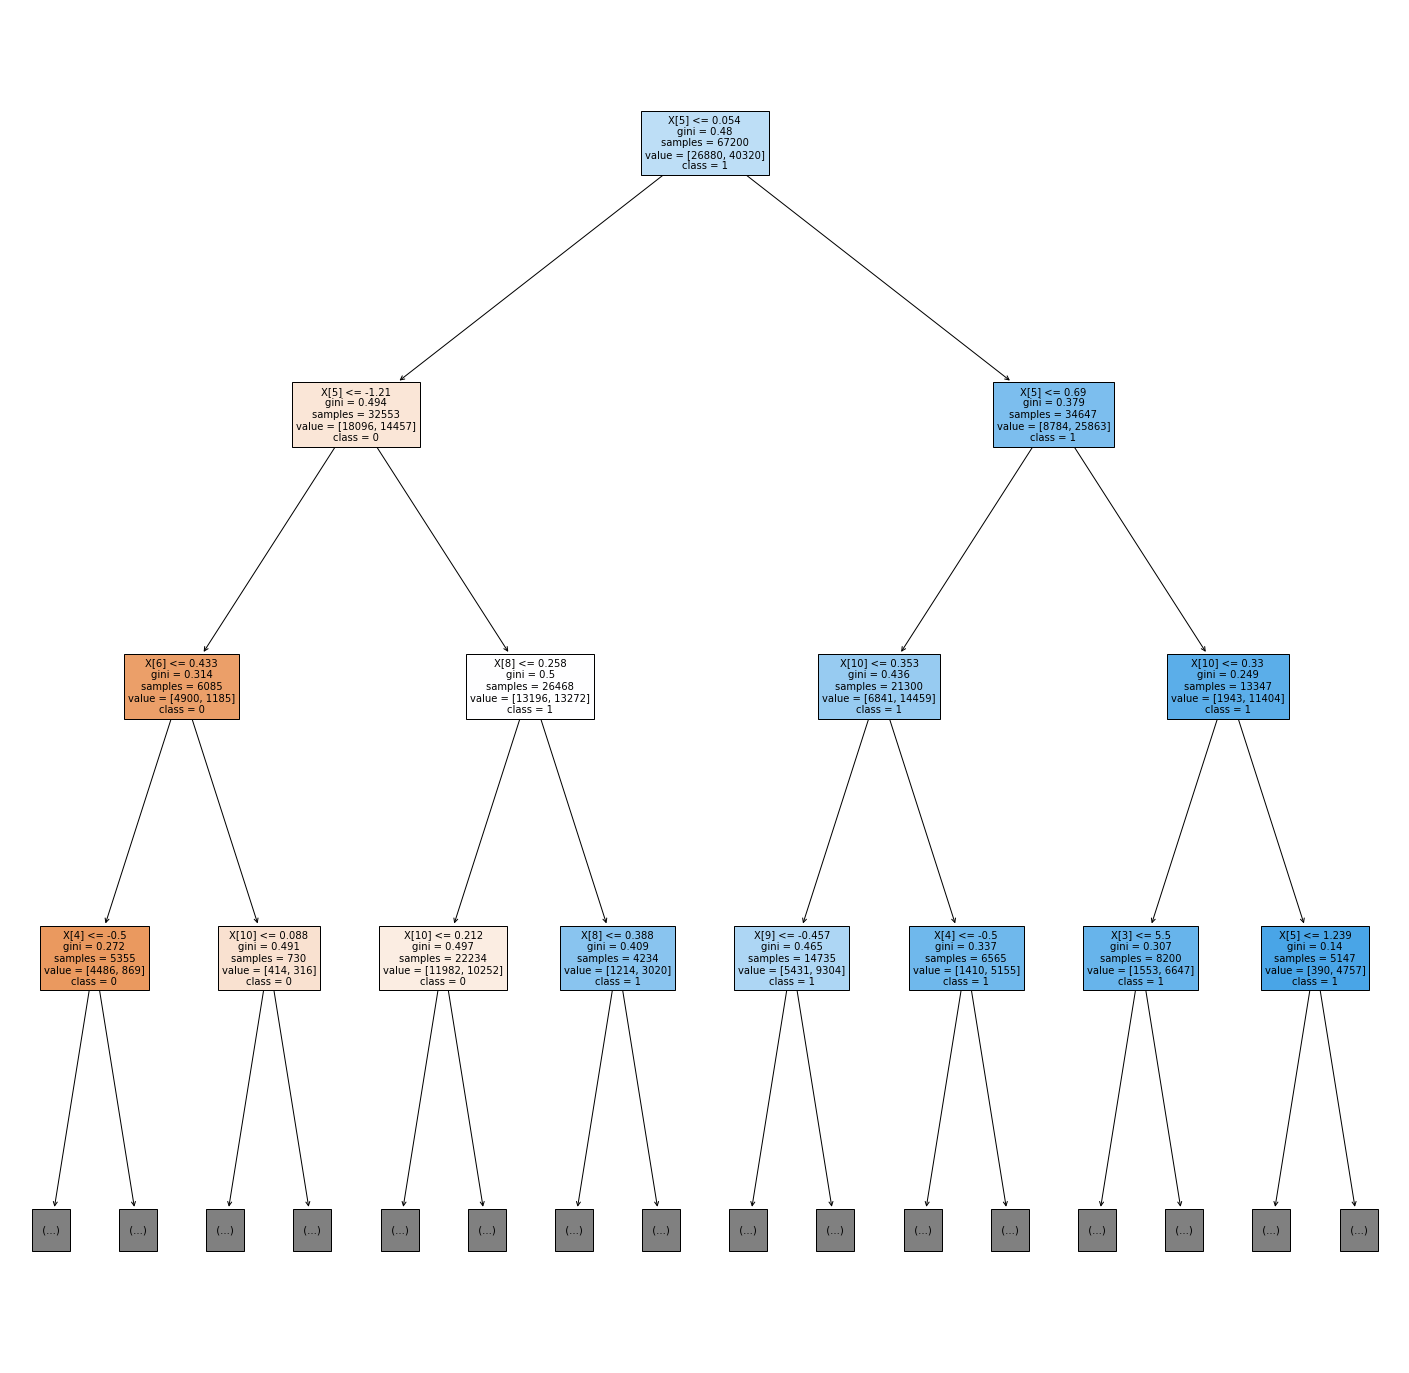

In [11]:
plt.figure(figsize=(25,25))
tree.plot_tree(model1, fontsize=10, max_depth=3,class_names='01', filled=True)
plt.show()

#### Importancia de las variables

El principal objetivo de nuestro algoritmo, ayudar a la selección de variables para el resto de modelos. La verdad, que no arroja ningún resultado nuevo con respecto a nuestro [notebook 2.0.4.](http://localhost:8888/notebooks/Desktop/CUNEF/Practica%20Machine%20Learning/project_template/notebooks/2.0.4.%20Preprocesing.%20Seleccion%20de%20Variables..ipynb) Selección de variables donde la configuración del accidente marca la mortalidad del mismo. Los aspectos de años, meses y semanas parecen no tener importancia para el modelo. 

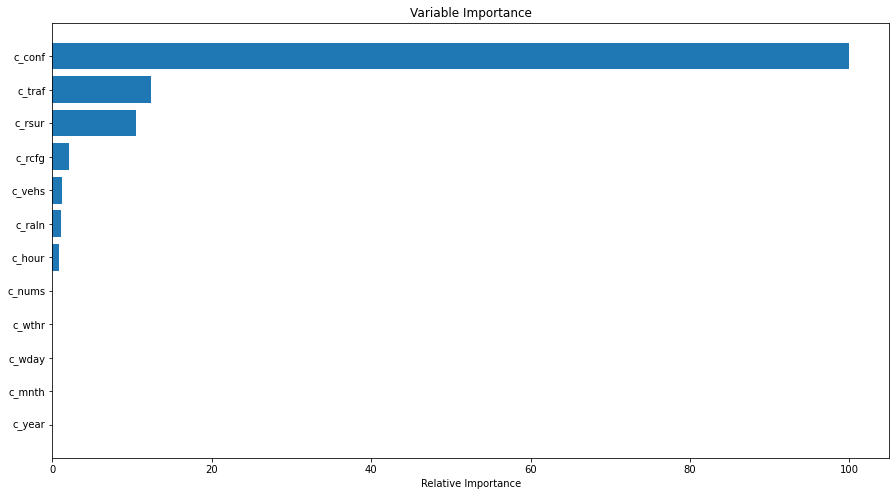

In [12]:
feature_importance = model1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(15, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

---

#### ENLACES DE INTERÉS:

[`¿Qué son los arboles de decisión y para que sirven?`](https://www.maximaformacion.es/blog-dat/que-son-los-arboles-de-decision-y-para-que-sirven/)

[`árboles de decisión DATACAMP`](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

[`árboles de decisión SCIKIT-LEARN`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[`Learning from imbalanced data`](https://www.jeremyjordan.me/imbalanced-data/)

---